In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = pd.read_csv('Iris (1).csv', index_col='Id')
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.rename({'SepalLengthCm': 'sepal_length',
           'SepalWidthCm': 'sepal_width',
           'PetalLengthCm': 'petal_length',
           'PetalWidthCm': 'petal_width',
           'Species': 'species'          
          }, inplace=True,axis=1)
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
Id,,,,,
79,6.0,2.9,4.5,1.5,Iris-versicolor
135,6.1,2.6,5.6,1.4,Iris-virginica
36,5.0,3.2,1.2,0.2,Iris-setosa
18,5.1,3.5,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
#calculate median of each species
x = df.groupby('species').median()
x

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [8]:
#Statistics of this dataset
stats = df.describe()
stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#calculate range, and move columns 25%,50%,75%  and mean values into a dataframe
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
new_df = stats.loc[['mean', 'range', '25%', '50%', '75%']]
new_df.rename({'50%': 'median'}, inplace=True)
new_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
range,3.600000,2.400,5.900000,2.400000
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000


In [10]:
#Calculate mean and median or others using multiple functions at once - 2 methods

df.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
df.groupby('species').agg([np.mean, np.median]) 

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

In [11]:
#If we want an explicit aggr function like max for a column
agg_dict={field: ['mean', 'median'] for  field in df.columns.tolist() if field != 'species'}
agg_dict['petal_length'] = 'max'
df.groupby('species').agg(agg_dict)

sepal_length        sepal_width        petal_length  \
                        mean median        mean median          max   
species                                                               
Iris-setosa            5.006    5.0       3.418    3.4          1.9   
Iris-versicolor        5.936    5.9       2.770    2.8          5.1   
Iris-virginica         6.588    6.5       2.974    3.0          6.9   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of petal-width')

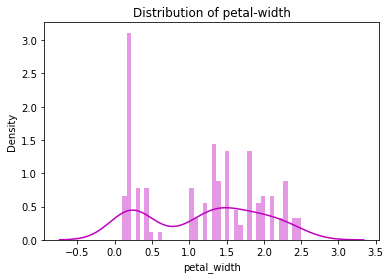

In [13]:
sns.distplot(a=df['petal_width'], bins=40, color='m')
plt.title('Distribution of petal-width')

<AxesSubplot:xlabel='species', ylabel='count'>

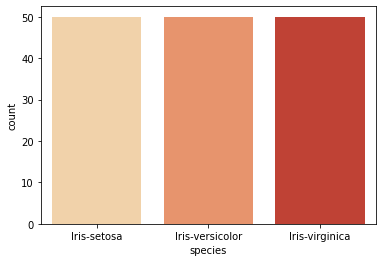

In [14]:
sns.countplot(x='species',data=df, palette="OrRd")

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

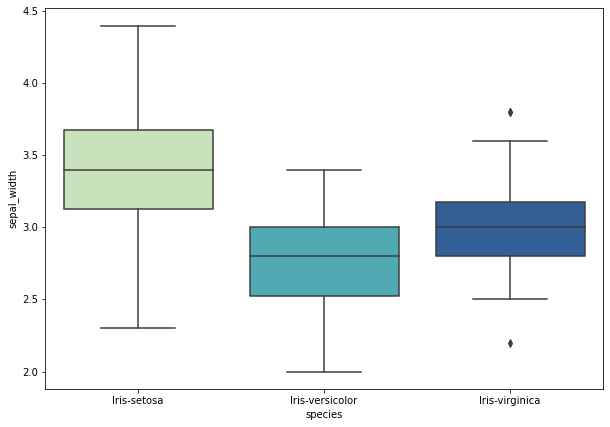

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='species',y='sepal_width',data=df ,palette='YlGnBu')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

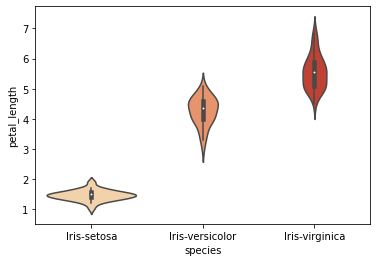

In [16]:
sns.violinplot(x='species', y='petal_length', data=df, palette='OrRd')

<AxesSubplot:>

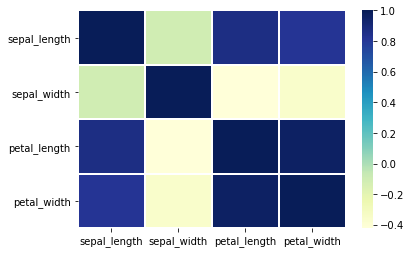

In [17]:
sns.heatmap(df.corr(),cmap="YlGnBu", linecolor='white', linewidths=1)

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

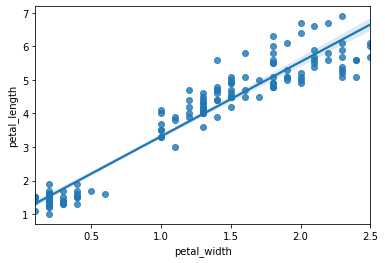

In [18]:
sns.regplot(x='petal_width', y='petal_length', data=df)

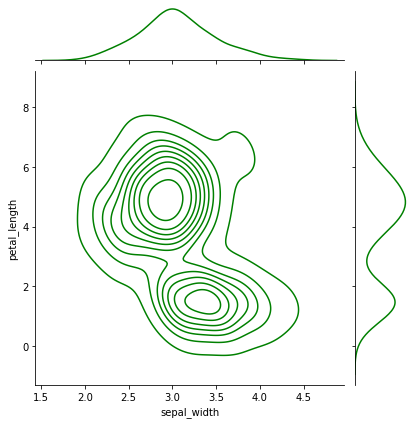

In [19]:
sns.jointplot(x="sepal_width", y="petal_length", data=df, kind="kde", color="g")

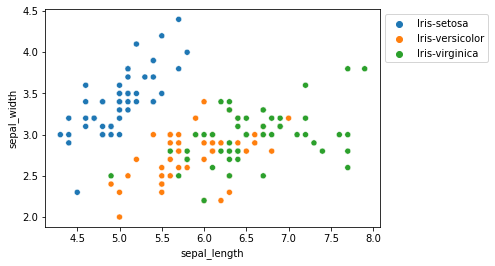

In [20]:
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

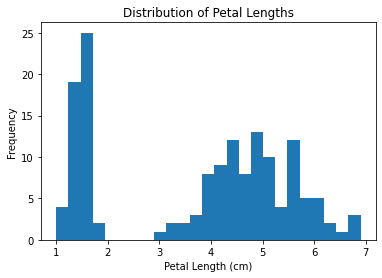

In [21]:
ax = plt.axes()
ax.hist(df.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

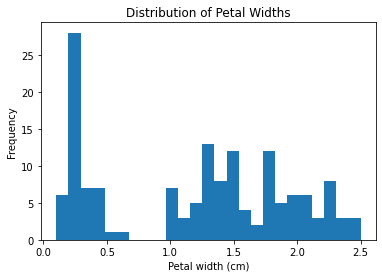

In [22]:
ax = plt.axes()
ax.hist(df.petal_width, bins=25);

ax.set(xlabel='Petal width (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Widths');

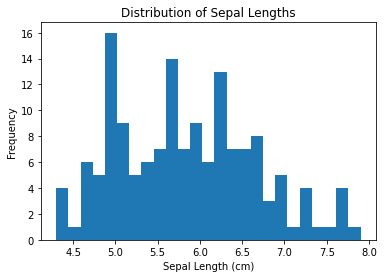

In [23]:
ax = plt.axes()
ax.hist(df.sepal_length, bins=25);

ax.set(xlabel='Sepal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Sepal Lengths');

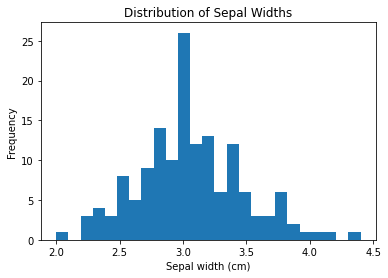

In [24]:
ax = plt.axes()
ax.hist(df.sepal_width, bins=25);

ax.set(xlabel='Sepal width (cm)', 
       ylabel='Frequency',
       title='Distribution of Sepal Widths');

In [25]:
plot_data = (df
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_width,3.5
2,Iris-setosa,petal_length,1.4
3,Iris-setosa,petal_width,0.2
4,Iris-setosa,sepal_length,4.9


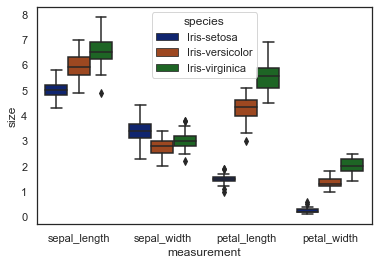

In [26]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

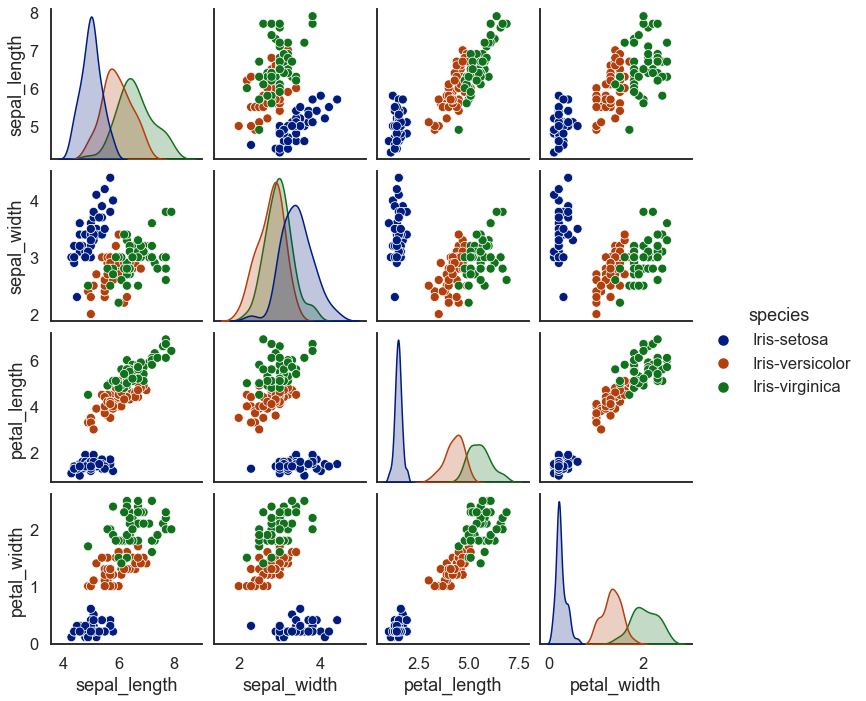

In [27]:
sns.set_context('talk')
sns.pairplot(df, hue='species');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

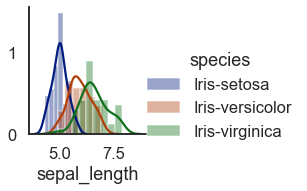

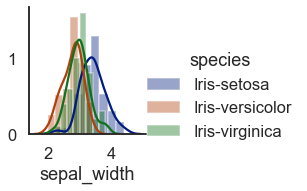

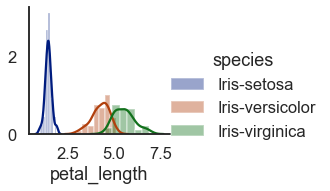

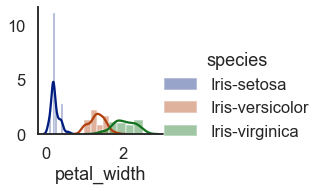

In [28]:
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "sepal_length").add_legend()
 
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "sepal_width").add_legend()
 
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "petal_length").add_legend()
 
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "petal_width").add_legend()

In [29]:
df.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


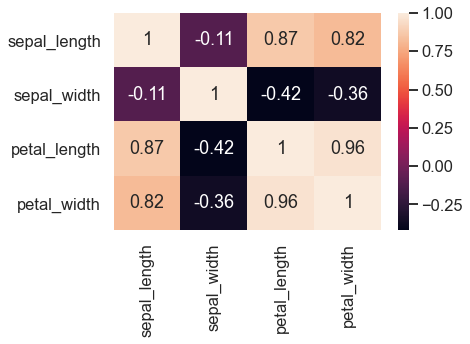

In [30]:
sns.heatmap(df.corr(method='pearson'), annot = True);
 
plt.show()

<AxesSubplot:xlabel='sepal_width'>

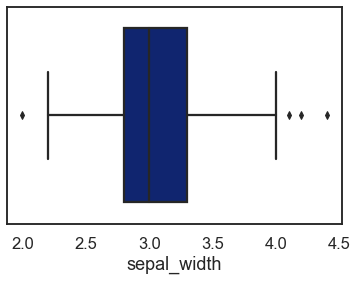

In [31]:
sns.boxplot(x='sepal_width', data=df)

Old Shape:  (150, 5)
New Shape:  (146, 5)


<AxesSubplot:xlabel='sepal_width'>

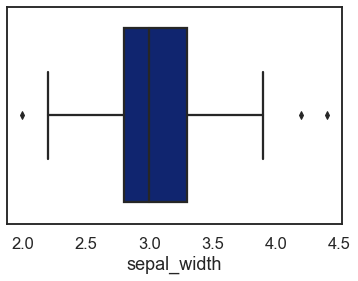

In [32]:
Q1 = np.percentile(df['sepal_width'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(df['sepal_width'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['sepal_width'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(df['sepal_width'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)
sns.boxplot(x='sepal_width', data=df)